### 🚜 Predicting the sale price of bulldozer- Regression

In the project the sales of bulldozer in the past will be used to predict sales in the future.

* **Problem definition**

How well to predict the future sale using the charateristics

* **Data**
The data is gotten from Kaggle bulldozer competition https://www.kaggle.com/c/bluebook-for-bulldozers/data. 
There are three main datasets;
1. Train.csv is the training set, which contains data through the end of 2011.
2. Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition.
3. Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012.

* **Evaluation**

The evaluation metric is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
The goal of most regression evaluation is to minimise the error and this project will use machine learning model to minimise RMSLE


* **Features**

A data dictionary showing the features of the data https://docs.google.com/spreadsheets/d/1GRWfza2d0wcYL5f1iJ77hc9XTxf-zl9H9bmvEkxQIOo/edit?usp=sharing

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [7]:
df = pd.read_csv("bulldozerdata/TrainAndValid.csv", low_memory = False)


**Exploring data (EDA exploratory data analysis)**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [9]:
# Are there missing data
df.isna()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True
412694,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True
412695,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True
412696,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True


In [10]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [11]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

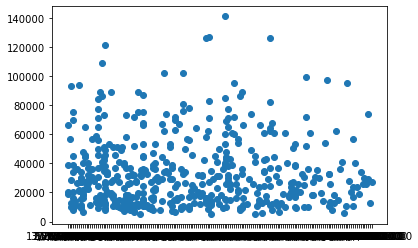

In [12]:
plt.scatter(df['saledate'][:500], df['SalePrice'][:500])
plt.show()

In [13]:
df.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

(array([151074., 119019.,  58000.,  32444.,  22876.,  13474.,   9330.,
          3884.,   2036.,    561.]),
 array([  4750.,  18475.,  32200.,  45925.,  59650.,  73375.,  87100.,
        100825., 114550., 128275., 142000.]),
 <BarContainer object of 10 artists>)

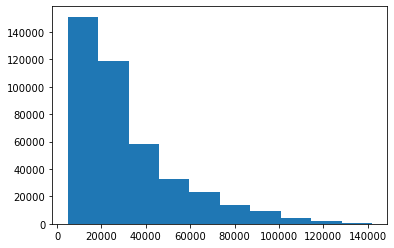

In [14]:
plt.hist(df['SalePrice'])

## Feature engineering

Feature engineering involves making adjustment to column feature or adding a new feature to dataset
##### **Parsing Date**

When working with time series data there is a need to modify it so that Pandas can identify which column is for date and time using the `parse dates` parameter (datetime object)

In [15]:

df = pd.read_csv("bulldozerdata/TrainAndValid.csv", low_memory = False, parse_dates =['saledate'])

#Another option

#df['saledate'] = pd.to_datetime(df['saledate'], format='%d%b%Y')


In [16]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

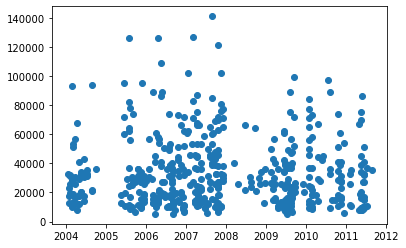

In [17]:
plt.scatter(df['saledate'][:500], df['SalePrice'][:500])

In [18]:
df.saledate.dtype

dtype('<M8[ns]')

In [19]:
#transposing
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


#### Sort DataFrame by `saledate`

when working with time series problem it is important to sort the date by the dates

In [20]:
# sort DataFrame in date order

df_tmp = df.sort_values(by = ['saledate'], ascending =True)

df_tmp.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

**Adding year, month and day column to the data**

Add datatime parameter to `saledate` column

In [21]:
# creating column

df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] =df_tmp.saledate.dt.dayofyear

df_tmp.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

In [22]:
# check if the created columns are in the data and add the column names to the data dictionary

df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [34]:
# removing saledate column to avoid duplicating the date time data

df_tmp.drop(['saledate'], axis= 1, inplace=True)

In [35]:
# check the value of different column

df_tmp.state.value_counts()[:10]

Florida        67320
Texas          53110
California     29761
Washington     16222
Georgia        14633
Maryland       13322
Mississippi    13240
Ohio           12369
Illinois       11540
Colorado       11529
Name: state, dtype: int64

#### Handling Missing Data and Transforming Data to Numeric Value

* Transform string to categories: to turn data to number it need to be converted into pandas categories (using pandas type api https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html)

In [36]:
# find the columns containing string using pandas dtype api

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
     print(label)
    

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [37]:
# change the data type with `astype`
# change string value into category values
# as_ordered arrange aphalbetically
# with the pandas category the data can now be accessed as number

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [38]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [39]:
# export the data to save a copy of preprocessed data

df_tmp.to_csv('bulldozerdata/train_df_tmp.csv', index=False)

**Fill missing data**

In [40]:
# check where there are missing data

df_tmp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

**Fill numeric missing values**

In [41]:
# check which columns have numeric values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [42]:
# check which columns have missing numeric values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
         print(label)

auctioneerID
MachineHoursCurrentMeter


In [43]:
# fill the missing numeric values in the columns 

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum(): 
            # Add a binary column which tells the lable with missing values
            df_tmp[label+'_is_missing'] = pd.isnull(content)
            # filling the missing values with the median values which is more robust than filling with the mean value
            df_tmp[label] = content.fillna(content.median())
              

In [44]:
# check that numeric columns are filled

df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

#### Filling and Turning Categories variables to numeric values

In [45]:
# check columns that are not numeric

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [46]:
# turn catergory columns to nummeric values and fill missing values
# + 1 is to convert negative values to positive

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        df_tmp[label] = pd.Categorical(content).codes+1
        
        

In [47]:
pd.Categorical(df_tmp['state']).codes +1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [31]:
#checking if all is filled

df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

Encode/transform all categorical variables of your data (on the entire dataset, this ensures categorical variables are encoded the same across training/test sets, if you can't do this, make sure the training and test sets have the same column names).

Split your data (into train/test).

Fill the training set and test set numerical values separately.

Don’t use numerical data from the future (test set) to fill data from the past (training set).

In [48]:
# prepare data by splitting according to specific time frame

df_train = df_tmp[df_tmp.saleYear != 2012]
df_val = df_tmp[df_tmp.saleYear == 2012]


len(df_train), len(df_val)

(401125, 11573)

In [49]:
#splitting into training and validation

X_train, y_train = df_train.drop(['SalePrice'],axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop(['SalePrice'],axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Modelling
Model driven EDA




In [51]:
# building the machine learning

from sklearn.ensemble import RandomForestRegressor

# instantiate the model
# n_jobs is the no of jobs to run in parallel to use as many core processor (-1 mean use all available) on the system to execute 
model = RandomForestRegressor(n_jobs=-1,
                             random_state =42) 



In [52]:
# this takes far to long to fit in the model for experimenting because the dataset has over 400k rows
%time
model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [53]:
model.score(X_valid, y_valid)

0.8727175969771312

#### Building Evaluation Function

The evaluation metric is the RMSLE (root mean squared log error) between the actual and predicted auction prices. 

In [65]:
# create custom evaluation function for RMSLE

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score


def rmsle(y_test,y_preds):
    """
    Calculate the RMSLE between predition and ture labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


# Create a function to evalaute model on different metrics

def show_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    
    scores = { "Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid,valid_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, valid_preds),
             "Training r2": r2_score(y_train, train_preds),
             "Valid r2": r2_score(y_valid, valid_preds)
            }

    return scores

### Testing model on a subset to tune the hyperparameters


* subset can be by either splicing the X-train and y-train dataset when training the model 
e.g model.fit(X_train[:10000], y_train[10000])

* OR adjust the max_sample parameter

In [54]:
# change the max_samples

model = RandomForestRegressor(n_jobs=-1,
                             random_state =42, max_samples = 10000) 

In [57]:
# cutting down the number of samples each estimator can see improves training time
%time
model.fit(X_train, y_train)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [66]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training r2': 0.8606658995199189,
 'Valid r2': 0.8320374995090507}

#### Adjusting Hyperparameters using RandomisedSearchCV

Hyperparameters turning with RandomisedSearchCV

In [119]:
%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = { "n_estimators": np.arange(10,100,10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, 'sqrt', 'auto'],
           "max_samples": [10000]
    }

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1, random_state =42),
                              param_distributions = rf_grid,
                              n_iter = 2,
                              cv = 5,
                              verbose = True
                               )

# Fit randomisesearchcv model

rs_model.fit(X_train, y_train)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   55.9s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [149]:
# find the best model's hyperparameters

rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 14,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [150]:
rs_model.score(X_valid, y_valid)

0.676651273490898

In [151]:
show_scores(rs_model)

{'Training MAE': 9095.830369629732,
 'Valid MAE': 10599.075909685627,
 'Training RMSLE': 0.3992617903306438,
 'Valid RMSLE': 0.42227576289571794,
 'Training r2': 0.6718358139656028,
 'Valid r2': 0.676651273490898}

In [152]:
# ideal model using the best hyperparameter generated by the randomizedsearchcv

ideal_model = RandomForestRegressor(n_jobs = -1, random_state =42, n_estimators =40,
 min_samples_split = 14,
 min_samples_leaf = 9,
 max_samples =10000,
 max_features = 'sqrt',
 max_depth =10)

### Make prediction on the test data

In [95]:
df_test = pd.read_csv('bulldozerdata/test.csv', low_memory= False, parse_dates= ['saledate'])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the test data to be in the same format as the training data



In [100]:
def preprocess(df):

    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] =df.saledate.dt.dayofyear
# removing saledate column to avoid duplicating the date time data

    df.drop(['saledate'], axis= 1, inplace=True)
    

# fill the missing numeric values in the columns 

    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum(): 
            # Add a binary column which tells the lable with missing values
             df[label+'_is_missing'] = pd.isnull(content)
            # filling the missing values with the median values which is more robust than filling with the mean value
             df[label] = content.fillna(content.median())
                
# turn catergory columns to nummeric values and fill missing values

    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
              

    return df

In [101]:
preprocess(df_test)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [103]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [106]:
# check difference between train and test dataset

set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [107]:
# manually adjust df_test to have 'auctioneerID_is_missing' column so that both the train dataframe and test dataframe are same
# againt the initial 102 to 101 column respectively


df_test['auctioneerID_is_missing'] =False

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [109]:
# Make prediction on the test data


test_preds = rs_model.predict(df_test)

test_preds

array([26303.66855306, 25033.08938544, 40720.79228828, ...,
       24375.07236425, 28414.00804662, 30512.21497858])

In [110]:
# format the prediction to format acceptable for the submission


df_preds = pd.DataFrame()

df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds

df_preds

,SalesID,SalesPrice
0,1227829,26303.668553
1,1227844,25033.089385
2,1227847,40720.792288
3,1227848,43954.189706
4,1227863,37797.887770
...,...,...
12452,6643171,29188.557473
12453,6643173,29645.673638
12454,6643184,24375.072364
12455,6643186,28414.008047


In [111]:
# Export prediction result as csv

df_preds.to_csv('bulldozerdata/bulldozer_price_prediction.csv', index=False)

### Feature Importance

which different features of the data are more important for the prediction of the `SalePrice`

In [123]:
# feature_importance an attribute of RandomForestRegressor

model_features= model.feature_importances_

model_features

array([4.81382349e-02, 2.26248605e-02, 2.96496488e-02, 1.07927243e-03,
       5.92733555e-03, 2.51855319e-01, 4.18515309e-03, 1.62734184e-03,
       2.44185446e-02, 4.70228642e-02, 5.77325398e-02, 4.01605795e-03,
       5.67796434e-03, 2.15957741e-01, 3.12966837e-02, 1.15603859e-02,
       1.86911840e-03, 1.58631609e-03, 1.47202823e-03, 2.35191239e-02,
       6.95798509e-04, 2.40507940e-04, 1.45976988e-03, 2.14944291e-04,
       1.22242119e-03, 5.53187617e-05, 1.62080945e-03, 2.26947237e-02,
       3.41885107e-04, 3.01379262e-04, 4.47155935e-03, 4.14756721e-03,
       2.97945200e-03, 6.47383047e-04, 5.38110216e-04, 3.83226809e-03,
       1.49471065e-03, 1.55948966e-02, 8.37608421e-04, 2.02385611e-04,
       2.67159742e-04, 1.20711179e-03, 1.59966844e-03, 9.18589730e-04,
       7.16916543e-04, 9.16552395e-04, 1.94377163e-04, 2.77720382e-03,
       1.18741990e-03, 2.05152234e-04, 1.70343148e-04, 6.47745211e-02,
       4.58841854e-03, 1.30318185e-02, 6.58337683e-03, 1.38579377e-02,
      

In [147]:
# create a function for plotting features importance
# n = number of importances features
def plot_features(columns, importances, n= 20):
    df = (pd.DataFrame({ 'features': columns,
                       'feature_importances': importances})
    .sort_values('feature_importances', ascending = False)
    .reset_index(drop=True))
    
    #plot the dataframe
    
    plt.barh(df['features'][:n], df['feature_importances'][:n])
    plt.ylabel('Features')
    plt.xlabel('Features Importance')
    

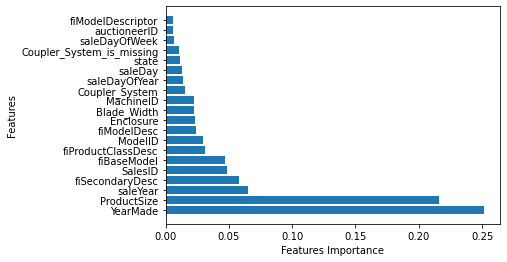

In [148]:
plot_features(X_train.columns, model_features)

### Further Analysis

What other machine learning model could be tired for this experiment usch as XGBoost, CatBoost